In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-24-21-29_BanditStatic_/BanditStatic.csv")
narms = masterdata.iloc[0]['k']

In [3]:
masterdata.tail(20)

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration
1999980,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.10,17.97,1.7176,99980
1999981,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.02,17.94,1.7592,99981
1999982,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.10,18.17,2.1467,99982
1999983,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.16,18.14,2.0623,99983
1999984,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.10,18.22,2.1622,99984
1999985,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.08,18.15,1.8525,99985
1999986,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.18,18.18,2.0227,99986
1999987,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.26,17.97,2.0032,99987
1999988,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.00,17.91,1.9494,99988
1999989,MP-TS-ADWIN-0.1,StaticGenerator-100,KL-1-100-0.9,20.08,18.02,2.0264,99989


In [4]:
sorted(masterdata.bandit.unique())

['CUCB',
 'CUCBm',
 'Exp3.M',
 'IMP-TS',
 'MP-KLUCB',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-TS',
 'MP-TS-ADWIN-0.1',
 'OS']

In [5]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [6]:
masterdata.shape

(2000000, 8)

In [7]:
masterdata.groupby(["bandit", "scalingstrategy"])[['gain', 'k', 'reward/arm']].mean()

gain          k  reward/arm
bandit          scalingstrategy                                  
CUCB            KL-1-100-0.7     42.019078  59.903252    0.701470
                KL-1-100-0.9     17.698639  19.650706    0.901106
CUCBm           KL-1-100-0.7     42.073759  59.976425    0.701526
                KL-1-100-0.9     17.960396  19.935100    0.901390
Exp3.M          KL-1-100-0.7     14.244562  20.530375    0.610230
                KL-1-100-0.9      1.525323   2.116770    0.601318
IMP-TS          KL-1-100-0.7     42.090297  59.999034    0.701537
                KL-1-100-0.9     18.051977  20.038408    0.901314
MP-KLUCB        KL-1-100-0.7     42.077083  59.981219    0.701525
                KL-1-100-0.9     17.997879  19.976166    0.901413
MP-KLUCBPLUS    KL-1-100-0.7     42.088862  59.995974    0.701549
                KL-1-100-0.9     18.038684  20.021705    0.901401
MP-OTS          KL-1-100-0.7     42.090588  59.998942    0.701543
                KL-1-100-0.9     18.050263  20.036326    0.901322
MP-TS           KL-1-100-0.7     42.088822  59.996130    0.701547
                KL-1-100-0.9     18.040229  20.024018    0.901380
MP-TS-ADWIN-0.1 KL-1-100-0.7     41.951925  59.920955    0.700144
                KL-1-100-0.9     18.063175  20.133619    0.897608
OS              KL-1-100-0.7     42.299336  60.503492    0.699141
                KL-1-100-0.9     18.447818  20.529359    0.899053

In [8]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.716340e+01,2.784493e+01,4.040081e-01,4.999950e+04,7.813759e-01
std,2.176628e+01,1.392408e+01,4.394694e-01,2.886752e+04,1.166244e-01
min,1.000000e+00,3.400000e-01,9.100000e-03,0.000000e+00,3.090909e-01
25%,1.998000e+01,1.796000e+01,1.878000e-01,2.499975e+04,6.994499e-01
50%,2.023000e+01,1.834000e+01,2.271000e-01,4.999950e+04,7.086181e-01
75%,5.999000e+01,4.204000e+01,2.895000e-01,7.499925e+04,9.000000e-01
max,1.000000e+02,5.068000e+01,6.150200e+00,9.999900e+04,9.305136e-01


In [9]:
masterdata['dataset'].unique()

array(['StaticGenerator-100'], dtype=object)

In [10]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)

In [11]:
styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': "black", 'linestyle': "-"},
    'OD': {'marker': '', 'color': "red", 'linestyle': "-"},
}

In [12]:
masterdata["scalingstrategy"].unique()

array(['KL-1-100-0.7', 'KL-1-100-0.9'], dtype=object)

In [13]:
delta = 0.9
scalingstrategy  = 'KL-1-100-%s'%delta
data = masterdata.loc[masterdata["scalingstrategy"] == scalingstrategy]

In [14]:
data.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'iteration', 'reward/arm'],
      dtype='object')

In [15]:
data.groupby("bandit")["reward/arm"].describe()

,count,mean,std,min,25%,50%,75%,max
bandit,,,,,,,,
CUCB,100000.0,0.901106,0.009491,0.496429,0.896797,0.901316,0.905775,0.928463
CUCBm,100000.0,0.901390,0.009425,0.496429,0.897192,0.901606,0.905983,0.930514
Exp3.M,100000.0,0.601318,0.126662,0.309091,0.517544,0.565217,0.637037,0.928987
IMP-TS,100000.0,0.901314,0.009425,0.497347,0.897051,0.901549,0.906000,0.927536
MP-KLUCB,100000.0,0.901413,0.009412,0.496429,0.897192,0.901652,0.905966,0.928141
MP-KLUCBPLUS,100000.0,0.901401,0.009417,0.496429,0.897051,0.901500,0.906000,0.930326
MP-OTS,100000.0,0.901322,0.009438,0.499082,0.897000,0.901500,0.906000,0.927036
MP-TS,100000.0,0.901380,0.009495,0.503100,0.897000,0.901500,0.906000,0.928500
MP-TS-ADWIN-0.1,100000.0,0.897608,0.009479,0.502959,0.893306,0.897817,0.902282,0.924651


In [16]:
prettynames = {
    "CUCB": "S-CUCB",
    "CUCBm": "S-CUCBm",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-KLUCBPLUS": "S-KL-UCB+",
    "IMP-TS": "S-ITS",
    "MP-OTS": "S-OTS",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "S-DO",
    "OR": "S-RO",
    "OS": "S-SO"
}

selectedbandits =  ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1", "OD", "OR", "OS"]

In [17]:
pullref = np.full(100000,20)

In [18]:
#expected_gains = np.linspace(0.995,0.5,9901) #expected_gains = np.linspace(0.9975,0.5025,9901)
expected_gains = np.linspace(0.9966666666666667,0.5016666666666666,9901)

<IPython.core.display.Javascript object>


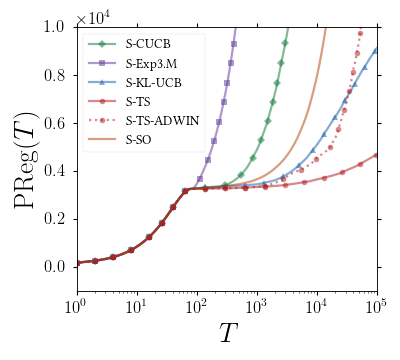

CUCB : 41519.85
Exp3.M : 1794802.98
MP-KLUCB : 9126.92000002
MP-TS : 4682.21000001
MP-TS-ADWIN-0.1 : 16762.55
OS : 52935.92


In [19]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[data["bandit"].isin(selectedbandits)].groupby("bandit")

j = 0
for i,df in data_grouped:
    j += 1
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.xlabel(r'$T$')
plt.ylim((-1000,10000))
plt.legend(fontsize = 12, ncol=1, loc='best')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("static_PReg_delta=%s.pdf"%(delta))

<IPython.core.display.Javascript object>


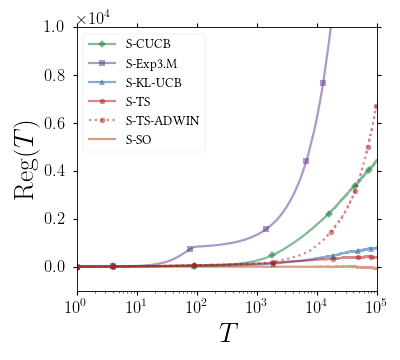

CUCB : 4449.096102
Exp3.M : 52429.8843108
MP-KLUCB : 778.887063167
MP-TS : 396.004055833
MP-TS-ADWIN-0.1 : 6862.03432433
OS : -67.7754278334


In [26]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[data["bandit"].isin(selectedbandits)].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains[int((x-1)*100)]*x for x in ks] - gains
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.2, alpha=0.5, markersize=5,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.xlabel(r'$T$')
plt.ylim((-1000,10000))
plt.legend(fontsize = 12, ncol=1, loc='best')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("static_Reg_delta=%s.pdf"%(delta))

<IPython.core.display.Javascript object>


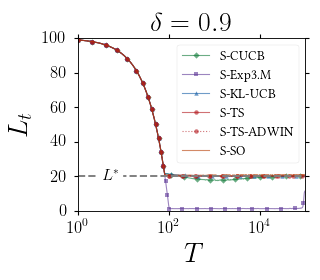

CUCB : 27.33746701846967
Exp3.M : 13.118786279683368
MP-KLUCB : 28.200712401055387
MP-TS : 28.177044854881228
MP-TS-ADWIN-0.1 : 28.165725593667517
OS : 28.550501319261198


In [27]:
%matplotlib notebook

plt.figure(figsize=(4,3.5))

data_grouped = data[data["bandit"].isin(selectedbandits)].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
    df = df.iloc[[0] + list(indices)]
    name = df['bandit'][0]
    if(name in ["OD", "OR"]):
        pass
    else:
        lw = 1
        df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.6, markersize=4,# logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))
    
plt.axhline(y=20, linestyle="--", c="grey")
plt.text(5, 20, "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.xlabel("$T$")
plt.title(r'$\delta=%s$'%delta)
plt.ylim((0,100))
plt.legend(fontsize = 12, ncol=1, loc='best')

plt.tight_layout()
plt.savefig("static_Lt_delta=%s.pdf"%(delta))

<IPython.core.display.Javascript object>


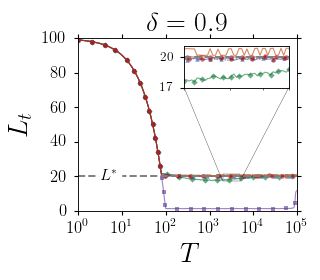

CUCB : 27.33746701846967
Exp3.M : 13.118786279683368
MP-KLUCB : 28.200712401055387
MP-TS : 28.177044854881228
MP-TS-ADWIN-0.1 : 28.165725593667517
OS : 28.550501319261198
CUCB : 27.33746701846967
Exp3.M : 13.118786279683368
MP-KLUCB : 28.200712401055387
MP-TS : 28.177044854881228
MP-TS-ADWIN-0.1 : 28.165725593667517
OS : 28.550501319261198


/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [28]:
%matplotlib notebook

plt.figure(figsize=(4,3.5))

data_grouped = data[data["bandit"].isin(selectedbandits)].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
    df = df.iloc[[0] + list(indices)]
    name = df['bandit'][0]
    if(name in ["OD", "OR"]):
        pass
    else:
        lw = 1
        df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.6, markersize=4,# logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))
    
plt.axhline(y=20, linestyle="--", c="grey")
plt.text(5, 20, "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.xlabel("$T$")
plt.title(r'$\delta=%s$'%delta)
plt.ylim((0,100))

plt.xticks([1,10,100,1000,10000,100000])

ax = plt.gca()
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 6, loc=1)

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
    df = df.iloc[[0] + list(indices)]
    name = df['bandit'][0]
    if(name in ["OD", "OR"]):
        pass
    else:
        lw = 1
        df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

x1, x2, y1, y2 = 2000, 5000, 17, 21 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

axins.tick_params(axis='x',which='both',labelbottom='off')

plt.tick_params(axis="both", labelsize=12)

plt.yticks([20,17], ["$20$","$17$"])
plt.axhline(y=20, linestyle="--", c="grey")

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")

plt.tight_layout()
plt.savefig("static_Lt_delta=%s.pdf"%(delta))

In [29]:
masterdata["bandit"].unique()

array(['CUCBm', 'MP-TS', 'MP-OTS', 'CUCB', 'OS', 'IMP-TS', 'MP-KLUCB',
       'MP-KLUCBPLUS', 'MP-TS-ADWIN-0.1', 'Exp3.M'], dtype=object)

In [21]:
selected_bandits = ['CUCB', 'MP-TS', 'MP-KLUCB', 'Exp3.M']

<IPython.core.display.Javascript object>


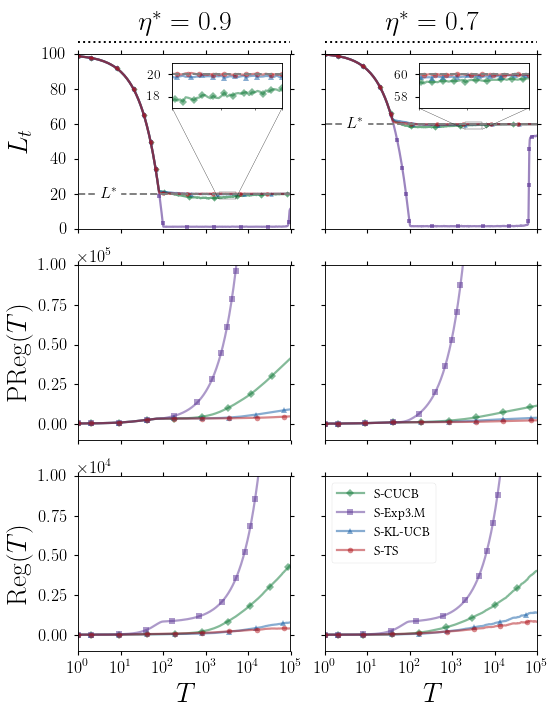

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [22]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

scalingstrategies = ['KL-1-100-0.9', 'KL-1-100-0.7']
targets = [20,60]
netas = [0.9,0.7]
pullrefs = [np.full(100000,20), np.full(100000,60)]

# top plots
offset = 0

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s$'%(netas[j]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expected_gains[int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_s.pdf")




<IPython.core.display.Javascript object>


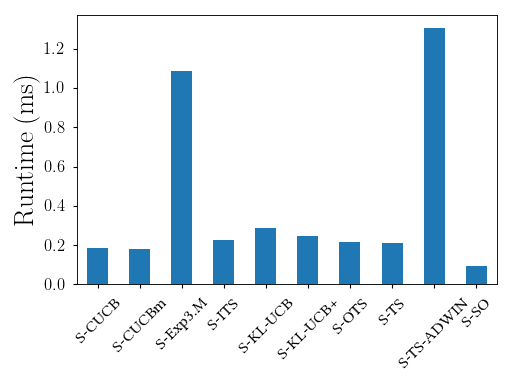

In [23]:
%matplotlib notebook
#algs = ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1"]

means = masterdata.groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar", rot=45)
plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.tight_layout()
plt.savefig("static_Runtime.pdf")

<IPython.core.display.Javascript object>


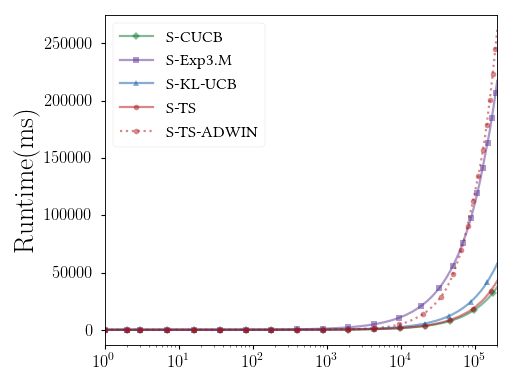

In [37]:
%matplotlib notebook

algs = ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1"]

data_grouped = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    cumsum.plot(label=prettynames[name],linewidth=lw, logx=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Runtime (ms)}$")
    plt.legend()
plt.tight_layout()
plt.savefig("static_CumulativeRuntime.pdf")